In [ ]:
# Data frame
import numpy as np
import pandas as pd

# Data viz
import matplotlib.pyplot as plt
import seaborn as sns

# Tratamento
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, MinMaxScaler, LabelEncoder
from sklearn.compose  import ColumnTransformer
from sklearn.model_selection import train_test_split

# Modelos
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression

# Validação
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

# Métricas
from sklearn.metrics import plot_confusion_matrix, plot_roc_curve, accuracy_score, f1_score, log_loss, confusion_matrix
from sklearn.tree import plot_tree, DecisionTreeClassifier

from yellowbrick.classifier import ClassificationReport


# Problema 1: Entendendo porque as pessoas votam

Em agosto de 2006 três pesquisadores fizeram um grande experimento no estado de Michigan para testar a hipótese de se a motivação das pessoas para votar é social, extrinsica ou por pressão. O primeiro parágrafo do artigo publicado por eles diz:

> Uma das mais impressionantes características de um sistema político democrático é a participação de milhões de eleitores nas eleições. Porque tantas pessoas votam apesar do fato que... 'o voto de uma única pessoa não tem significância dentro da grande quantidade total de todos os outros votos' ? Uma hipótese é devido a aderência as normas sociais. Votar é reconhecidamente um dever cívico e os cidadãos podem ser preocupar com a opinião de terceiros caso deixem de votar. O senso de dever dos eleitores foi por um longo tempo a explcicação mais aceita sobre o ato de votar..


## Dados

Os pesquisadores coletaram dados de 344.000 eleitores que foram atribuídos em diferentes grupos de forma aleatória, aproximadamente 191.000 foram atribuídos ao grupo controle e o restante foi atribuído em um dos 4 grupos de 'tratamento'. Esses 5 grupos correspondem a 5 variáveis binárias do dataset:

* Dever Cívico (variável civic duty): membros desse grupo receberam uma carta que dizia apenas: "DO YOUR CIVIC DUTY — VOTE!"
* Efeito Hawthorne (variável hawthorne): membros desse grupo receberam uma carta com a mensagem do Dever Cívico mais uma mensagem adicional "YOU ARE BEING STUDIED" e foram informados que o comportamento eleitoral deles seria examinado.
* "Self" (variável self) membros desse grupo receberam a mensagem "Dever Cívico" junto com os registros comparecimento de todos os outros da casa e uma mensagem informando que após a eleição ele receberia um novo registro atualizado.
* Vizinhos (variável neighbors) membros desse grupo receberam a mesma mensagem do "Self" e o registro de comparecimento de todos da casa e dos vizinhos, de forma a aumentar a pressão social.
* Controle (variável controle):  membros desse grupo não receberam nada e representam a situação típica de um eleitor.

Outras variáveis presentes no dataset incluem sex (0 para masculino e 1 para feminino), yob (ano de nascimento) e a variável dependente (1 se votou, 0 caso o contrário)

## Análise

1. Faça uma análise exploratória e tente identificar alguns padrões. Algumas sugestões: Número de eleitores, número de eleitores por grupo, eleitores por sexo, etc
2. Ajuste uma regressão logística usando apenas as variáveis cividduty, harthorne, self, vizinhos e controle. Quais variáveis foram significativas, teste a matriz de confusão para um limiar de 0.3 e crie uma curva roc.
3. Ajuste uma árvore de decisão com as mesmas variáveis usadas na regressão logística. Plote a matriz de confusão e a árvore usando plot_tree.
4. Ajuste os classificadores anteriores, mas dessa vez passando a opção de manter as classes balanceadas e usando a variável sex. Gere novamente a árvore usando plot_tree. Como a variável sex influencia na classificação do modelo?
5. Calcule as learning_curves, use todas as variáveis e faça o diagnóstico se está acontecendo overfitting ou underfitting.

In [ ]:
dados1 = pd.read_csv('https://raw.githubusercontent.com/abnr/ml-data/main/gerber.csv')

In [ ]:
dados1.head()

,sex,yob,voting,hawthorne,civicduty,neighbors,self,control
0,0,1941,0,0,1,0,0,0
1,1,1947,0,0,1,0,0,0
2,1,1982,1,1,0,0,0,0
3,1,1950,1,1,0,0,0,0
4,0,1951,1,1,0,0,0,0


In [ ]:
dados1.columns

Index(['sex', 'yob', 'voting', 'hawthorne', 'civicduty', 'neighbors', 'self',
       'control'],
      dtype='object')

In [ ]:
dados1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344084 entries, 0 to 344083
Data columns (total 8 columns):
 #   Column     Non-Null Count   Dtype
---  ------     --------------   -----
 0   sex        344084 non-null  int64
 1   yob        344084 non-null  int64
 2   voting     344084 non-null  int64
 3   hawthorne  344084 non-null  int64
 4   civicduty  344084 non-null  int64
 5   neighbors  344084 non-null  int64
 6   self       344084 non-null  int64
 7   control    344084 non-null  int64
dtypes: int64(8)
memory usage: 21.0 MB


SEX
hawthorne


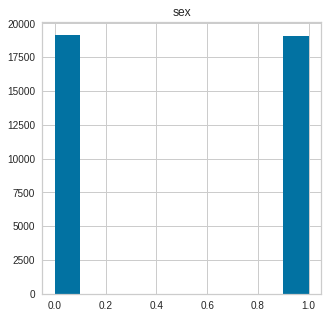

civicduty


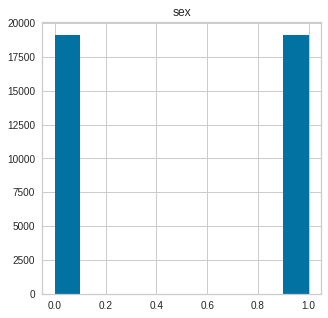

neighbors


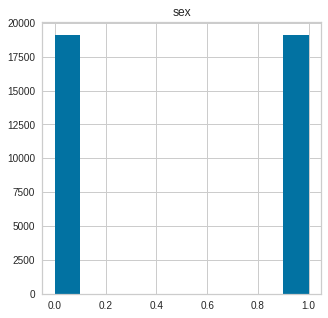

self


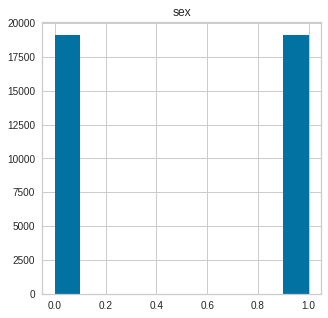

control


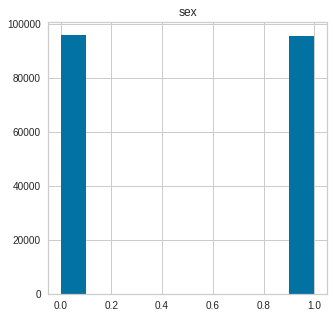



YOB
hawthorne


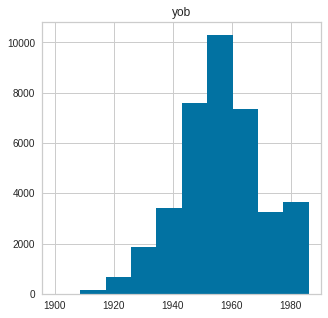

civicduty


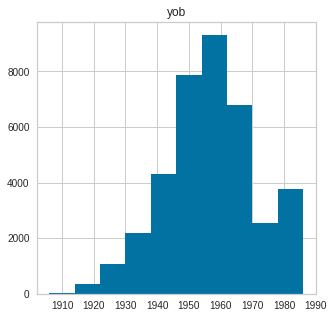

neighbors


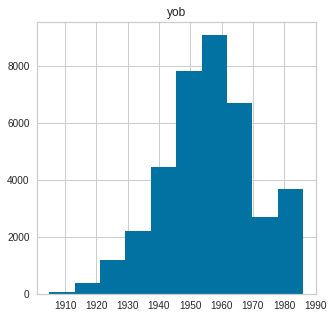

self


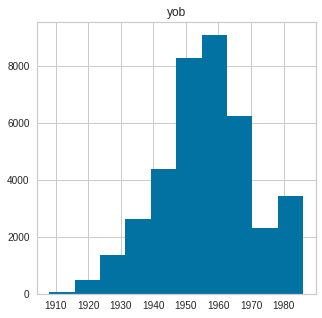

control


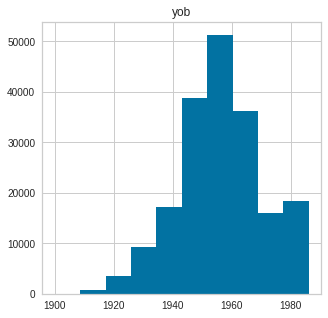



VOTING
hawthorne


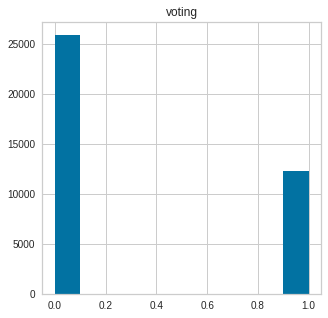

civicduty


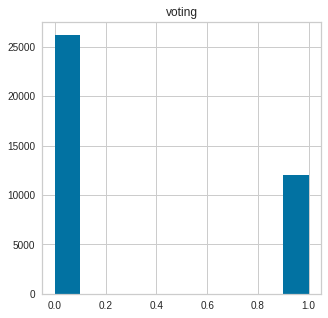

neighbors


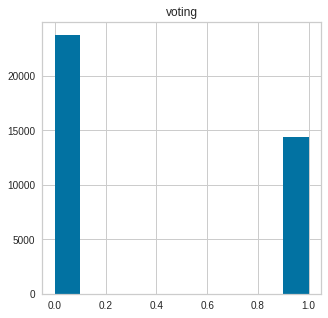

self


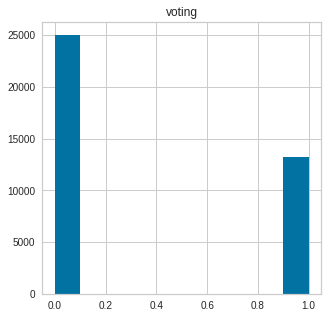

control


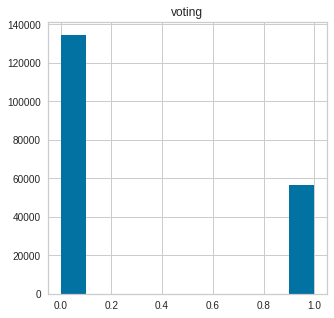

In [ ]:
print('SEX')
for coluna in  ['hawthorne', 'civicduty', 'neighbors', 'self', 'control']:
  print(coluna)
  dados1[dados1[coluna] == 1].hist(column=['sex'], figsize=(5,5))
  plt.show()
print('\n')
print('YOB')
for coluna in  ['hawthorne', 'civicduty', 'neighbors', 'self', 'control']:
  print(coluna)
  dados1[dados1[coluna] == 1].hist(column=['yob'], figsize=(5,5))
  plt.show()
print('\n')
print('VOTING')
for coluna in  ['hawthorne', 'civicduty', 'neighbors', 'self', 'control']:
  print(coluna)
  dados1[dados1[coluna] == 1].hist(column=['voting'], figsize=(5,5))
  plt.show()
print('\n')

In [ ]:
#Ajustando RegLog
X=dados1[['hawthorne', 'civicduty', 'neighbors', 'self', 'control', 'sex', 'yob']]
y=dados1['voting']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=123, stratify=y)

modelo_reglog=LogisticRegression()
modelo_reglog.fit(X_train[['hawthorne', 'civicduty', 'neighbors', 'self', 'control']],y_train)

LogisticRegression()

In [ ]:
coefs_reglog=pd.DataFrame(modelo_reglog.coef_,columns=X[['hawthorne', 'civicduty', 'neighbors', 'self', 'control']].columns).T
coefs_reglog

,0
hawthorne,-0.150385
civicduty,-0.189663
neighbors,0.087603
self,-0.054755
control,-0.278615


In [ ]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    import itertools
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
#         print("Normalized confusion matrix")
#     else:
#         print('Confusion matrix, without normalization')

#     print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.grid(False)

class_names = ['Votou', 'Não Votou']

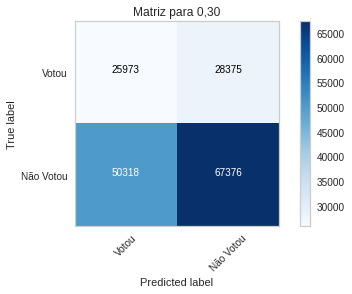

In [ ]:
predict_reglog = [1 if pred >= .30 else 0 for pred in modelo_reglog.predict_proba(X_train[['hawthorne', 'civicduty', 'neighbors', 'self', 'control']])[:,1]]
plot_confusion_matrix(confusion_matrix(y_train, predict_reglog, labels=[1, 0]), classes=class_names, title='Matriz para 0,30')

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


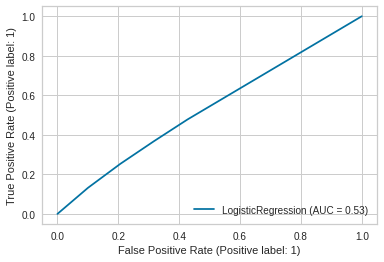

In [ ]:
plot_roc_curve(modelo_reglog, X_train[['hawthorne', 'civicduty', 'neighbors', 'self', 'control']], y_train)

In [ ]:
#Árvore de Decisão
modelo_arvore=DecisionTreeClassifier()
modelo_arvore.fit(X_train[['hawthorne', 'civicduty', 'neighbors', 'self', 'control']],y_train)

DecisionTreeClassifier()

[Text(0.7142857142857143, 0.9, 'control <= 0.5\ngini = 0.432\nsamples = 172042\nvalue = [117694, 54348]'),
 Text(0.5714285714285714, 0.7, 'neighbors <= 0.5\ngini = 0.449\nsamples = 76291\nvalue = [50318, 25973]'),
 Text(0.42857142857142855, 0.5, 'self <= 0.5\ngini = 0.441\nsamples = 57297\nvalue = [38501, 18796]'),
 Text(0.2857142857142857, 0.3, 'hawthorne <= 0.5\ngini = 0.435\nsamples = 38175\nvalue = [25978, 12197]'),
 Text(0.14285714285714285, 0.1, 'gini = 0.432\nsamples = 18971\nvalue = [12992, 5979]'),
 Text(0.42857142857142855, 0.1, 'gini = 0.438\nsamples = 19204\nvalue = [12986, 6218]'),
 Text(0.5714285714285714, 0.3, 'gini = 0.452\nsamples = 19122\nvalue = [12523, 6599]'),
 Text(0.7142857142857143, 0.5, 'gini = 0.47\nsamples = 18994\nvalue = [11817, 7177]'),
 Text(0.8571428571428571, 0.7, 'gini = 0.417\nsamples = 95751\nvalue = [67376, 28375]')]

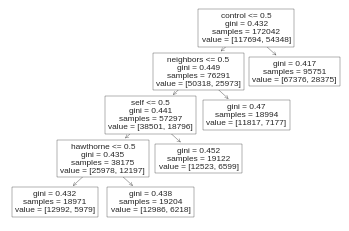

In [ ]:
plot_tree(modelo_arvore,feature_names=X_train[['hawthorne', 'civicduty', 'neighbors', 'self', 'control']].columns)

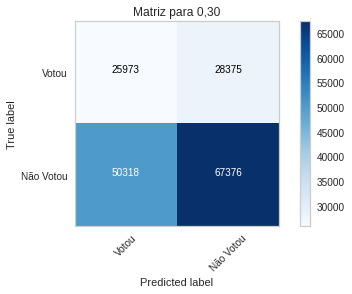

In [ ]:
predict_arvore = [1 if pred >= .30 else 0 for pred in modelo_arvore.predict_proba(X_train[['hawthorne', 'civicduty', 'neighbors', 'self', 'control']])[:,1]]
plot_confusion_matrix(confusion_matrix(y_train, predict_arvore, labels=[1, 0]), classes=class_names, title='Matriz para 0,30')

In [ ]:
modelo_reglog_sex=LogisticRegression(class_weight='balanced')
modelo_reglog_sex.fit(X_train[['hawthorne', 'civicduty', 'neighbors', 'self', 'control','sex']],y_train)

LogisticRegression(class_weight='balanced')

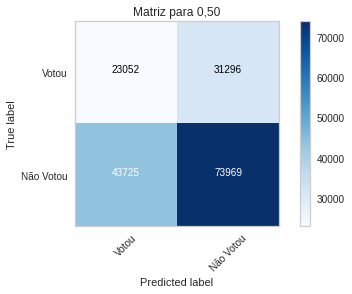

In [ ]:
predict_reglog_sex = [1 if pred >= .50 else 0 for pred in modelo_reglog_sex.predict_proba(X_train[['hawthorne', 'civicduty', 'neighbors', 'self', 'control','sex']])[:,1]]
plot_confusion_matrix(confusion_matrix(y_train, predict_reglog_sex, labels=[1, 0]), classes=class_names, title='Matriz para 0,50')

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


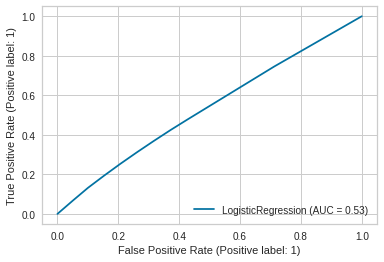

In [ ]:
plot_roc_curve(modelo_reglog_sex,X_train[['hawthorne', 'civicduty', 'neighbors', 'self', 'control','sex']],y_train)

In [ ]:
#Árvore de Decisão
modelo_arvore_sex=DecisionTreeClassifier(class_weight='balanced')
modelo_arvore_sex.fit(X_train[['hawthorne', 'civicduty', 'neighbors', 'self', 'control','sex']],y_train)

DecisionTreeClassifier(class_weight='balanced')

In [ ]:
plot_tree(modelo_arvore_sex)

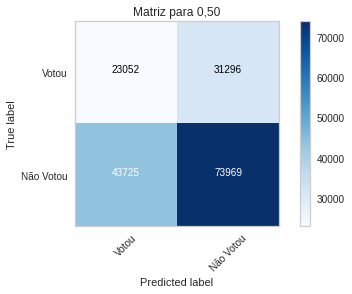

In [ ]:
predict_arvore_sex = [1 if pred >= .50 else 0 for pred in modelo_arvore_sex.predict_proba(X_train[['hawthorne', 'civicduty', 'neighbors', 'self', 'control','sex']])[:,1]]
plot_confusion_matrix(confusion_matrix(y_train, predict_arvore_sex, labels=[1, 0]), classes=class_names, title='Matriz para 0,50')

In [ ]:
from sklearn.model_selection import learning_curve
from sklearn.model_selection import train_test_split,learning_curve,KFold, StratifiedKFold, LeaveOneOut, cross_validate, validation_curve

In [ ]:
cv_kfold_stratified = StratifiedKFold(n_splits=10, shuffle=True, random_state=123)
train_sizes=np.linspace(.1, 1.0, 10)
train_sizes, train_scores, test_scores, fit_times, _ = \
    learning_curve(estimator=modelo_reglog_sex, cv=cv_kfold_stratified, X=X_train, y=y_train, n_jobs=-1,
                   train_sizes=train_sizes,
                   return_times=True, scoring='neg_log_loss')

In [ ]:
train_scores_mean = -np.mean(train_scores, axis=1)
train_scores_std = -np.std(train_scores, axis=1)
test_scores_mean = -np.mean(test_scores, axis=1)
test_scores_std = -np.std(test_scores, axis=1)
fit_times_mean = -np.mean(fit_times, axis=1)
fit_times_std = -np.std(fit_times, axis=1)

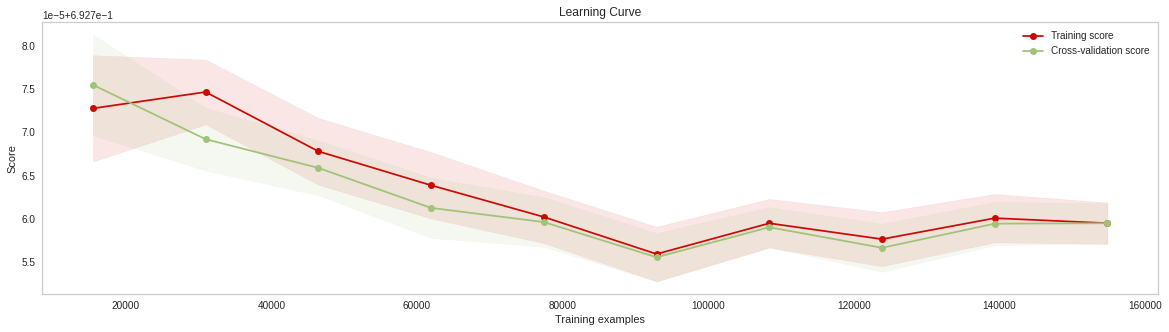

In [ ]:
# Plot learning curve
fig = plt.figure(figsize=(20, 5))

plt.title('Learning Curve')
plt.xlabel("Training examples")
plt.ylabel("Score")
plt.grid()
#plt.ylim((0,1))
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1,
                     color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")
plt.legend(loc="best")
plt.show()

In [ ]:
cv_kfold_stratified = StratifiedKFold(n_splits=10, shuffle=True, random_state=123)
train_sizes=np.linspace(.1, 1.0, 10)
train_sizes, train_scores, test_scores, fit_times, _ = \
    learning_curve(estimator=modelo_arvore_sex, cv=cv_kfold_stratified, X=X_train, y=y_train, n_jobs=-1,
                   train_sizes=train_sizes,
                   return_times=True, scoring='neg_log_loss')

In [ ]:
train_scores_mean = -np.mean(train_scores, axis=1)
train_scores_std = -np.std(train_scores, axis=1)
test_scores_mean = -np.mean(test_scores, axis=1)
test_scores_std = -np.std(test_scores, axis=1)
fit_times_mean = -np.mean(fit_times, axis=1)
fit_times_std = -np.std(fit_times, axis=1)

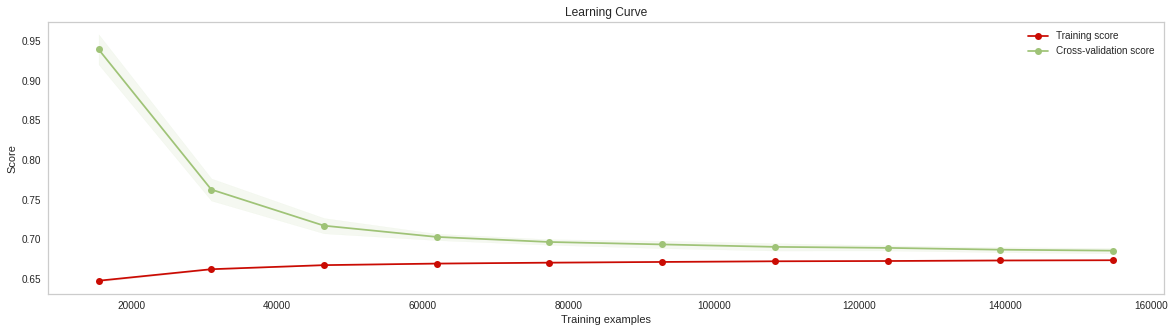

In [ ]:
# Plot learning curve
fig = plt.figure(figsize=(20, 5))

plt.title('Learning Curve')
plt.xlabel("Training examples")
plt.ylabel("Score")
plt.grid()
#plt.ylim((0,1))
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1,
                     color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")
plt.legend(loc="best")
plt.show()

# Problema 2: Prevendo o salário com dados do censo


Vamos usar um dataset do censo dos Estados Unidos disponível no UCI Machine Learning Repository para tentar classificar se uma pessoa recebe mais de $ 50.000,00 por ano. O arquivo census.csv contem o censo de 1994 com um total de 31.978 indivíduos e possui as seguintes variáveis:

* age: a idade em anos
* workclass: classificação do tipo de trabalho da pessoa (exemplo: trabalha pro governo federal, trabalha pro governo federal, trabalha sem remuneração, etc).
* education: o nível de educação (exemplos: high school, 5th-6th grade, PhD, etc)
* maritalstatus: o estado civil da pessoa.
* occupation: o tipo de trabalho (ex.: administrativo, vendas, etc)
* relationship: relacionamento do indivíduo com os membros da sua família
* race: raça da pessoa
* sex: sexo da pessoa
* capitalgain: o ganho de capital de pessoa em 1994 (por vender alguma propriedade)
* capitalloss: o prejuízo de capital de uma pessoa
* hoursperweek: número de horas trabalhadas por semana
* nativecountry: o país de nascimento
* over50k: se o indivíduo ganhou mais de $50.000,00 em 1994

## Análise

Divida o dataset em treino e teste. Crie uma árvore de classificação e use validação cruzada para escolher o melhor parâmetro de ```ccp_alpha```. Compare a árvore com melhor ```ccp_alpha```com uma árvore passando 0 para esse parâmetro. Utilize o plot_tree para visualizar as árvores. Por fim, faça as validation curves das duas árvores e compare os resultados.  

In [ ]:
dados2 = pd.read_csv('https://raw.githubusercontent.com/abnr/ml-data/main/census.csv')
dados2.head()

,age,workclass,education,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,nativecountry,over50k
0,39,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [ ]:
dados2.over50k.value_counts()

 <=50K    24283
 >50K      7695
Name: over50k, dtype: int64

In [ ]:
dados2.isna().sum()

age              0
workclass        0
education        0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
nativecountry    0
over50k          0
dtype: int64

In [ ]:
dados2['over50k']=dados2['over50k'].map({' <=50K': 0, ' >50K': 1, ' <=50K.': 0, ' >50K.': 1})
dados2

,age,workclass,education,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,nativecountry,over50k
0,39,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
31973,27,Private,Assoc-acdm,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,0
31974,40,Private,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,1
31975,58,Private,HS-grad,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,0
31976,22,Private,HS-grad,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,0


In [ ]:
dados2.dtypes

age               int64
workclass        object
education        object
maritalstatus    object
occupation       object
relationship     object
race             object
sex              object
capitalgain       int64
capitalloss       int64
hoursperweek      int64
nativecountry    object
over50k           int64
dtype: object

In [ ]:
dados2.describe()

,age,capitalgain,capitalloss,hoursperweek,over50k
count,31978.000000,31978.000000,31978.000000,31978.000000,31978.000000
mean,38.579023,1064.360623,86.739352,40.417850,0.240634
std,13.662085,7298.596271,401.594301,12.345285,0.427475
min,17.000000,0.000000,0.000000,1.000000,0.000000
25%,28.000000,0.000000,0.000000,40.000000,0.000000
50%,37.000000,0.000000,0.000000,40.000000,0.000000
75%,48.000000,0.000000,0.000000,45.000000,0.000000
max,90.000000,99999.000000,4356.000000,99.000000,1.000000


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


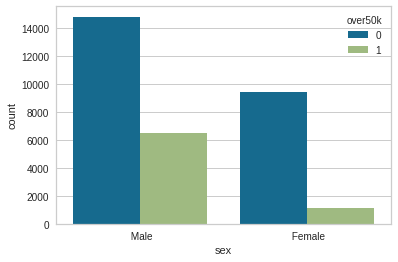

In [ ]:
sns.countplot(dados2['sex'], hue=dados2['over50k'])

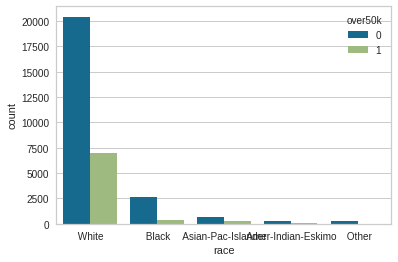

In [ ]:
sns.countplot(x=dados2['race'], hue=dados2['over50k'])

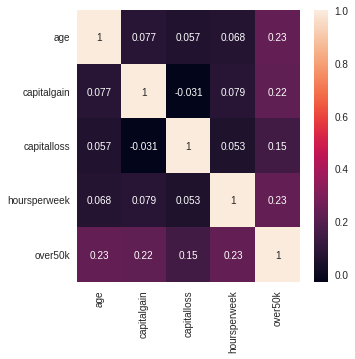

In [ ]:
corr=dados2.corr()
plt.figure(figsize=(5,5))
sns.heatmap(corr,annot=True)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f1fe7de2350>,
      dtype=object)

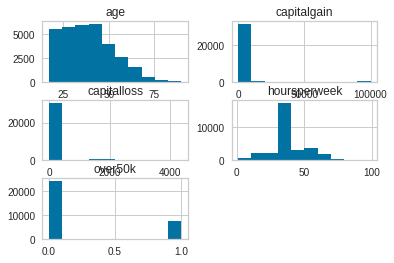

In [ ]:
dados2.hist()

In [ ]:
df_train, df_test = train_test_split(dados2,
                                     random_state=123,
                                     test_size=0.2,
                                     stratify=dados2['over50k'])

In [ ]:
X_train, y_train = df_train.drop('over50k', axis=1), df_train['over50k']
X_test, y_test = df_test.drop('over50k', axis=1), df_test['over50k']

In [ ]:
# Divisão dos dados
cat_columns_income = X_train.select_dtypes(include=['object']).columns.tolist()
num_columns_income = X_train.select_dtypes(exclude=['object']).columns.tolist()

In [ ]:
cat_columns_income

['workclass',
 'education',
 'maritalstatus',
 'occupation',
 'relationship',
 'race',
 'sex',
 'nativecountry']

In [ ]:
num_columns_income

['age', 'capitalgain', 'capitalloss', 'hoursperweek']

In [ ]:
# Pipeline
pipe_cat_columns_income = ('one_hot_encoder',
                          OneHotEncoder(handle_unknown='ignore'),
                          cat_columns_income)

pipe_num_columns_income = ('min_max_scaler',
                          MinMaxScaler(),
                          num_columns_income)

In [ ]:
transformers = [pipe_num_columns_income, pipe_cat_columns_income]
pre_processor = ColumnTransformer(transformers)

In [ ]:
model_dt = Pipeline(steps=[('pre_processor', pre_processor),
                            ('model', DecisionTreeClassifier(max_depth=5,random_state=123))])
model_dt.fit(X_train, y_train)

Pipeline(steps=[('pre_processor',
                 ColumnTransformer(transformers=[('min_max_scaler',
                                                  MinMaxScaler(),
                                                  ['age', 'capitalgain',
                                                   'capitalloss',
                                                   'hoursperweek']),
                                                 ('one_hot_encoder',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['workclass', 'education',
                                                   'maritalstatus',
                                                   'occupation', 'relationship',
                                                   'race', 'sex',
                                                   'nativecountry'])])),
                ('model',
                 DecisionTreeClassifier(max_depth=5, random_state=123))])

In [ ]:
classifiers = [model_dt]

for classifier in classifiers:
    classifier.fit(X_train, y_train)
    print(type(classifier['model']).__name__,'\n')
    print(f'log_loss treino: {log_loss(y_train, classifier.predict_proba(X_train)[:,1])}')
    print(f'log_loss teste: {log_loss(y_test, classifier.predict_proba(X_test)[:,1])}')
    print(100*'-')

DecisionTreeClassifier 

log_loss treino: 0.3402899850809717
log_loss teste: 0.35228889551177334
----------------------------------------------------------------------------------------------------


In [ ]:
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=123)

In [ ]:
#https://www.analyticsvidhya.com/blog/2020/10/cost-complexity-pruning-decision-trees/
tree = model_dt
X_preproc = tree[:-1].transform(X_train)
path = tree.steps[-1][1].cost_complexity_pruning_path(X_preproc, y_train)
alphas = path['ccp_alphas']
alphas

array([0.00000000e+00, 2.78279366e-06, 5.64221858e-05, 7.47851109e-05,
       7.66201259e-05, 9.56062645e-05, 9.76452094e-05, 1.68194793e-04,
       2.18524121e-04, 4.86347525e-04, 6.11432802e-04, 7.84677952e-04,
       8.22489067e-04, 9.11465832e-04, 1.26835385e-03, 2.01691834e-03,
       2.46382222e-03, 6.97583301e-03, 8.31761246e-03, 1.02945664e-02,
       1.56599368e-02, 2.36819265e-02, 7.26359016e-02])

In [ ]:
param_grid = dict(model__ccp_alpha=alphas)

In [ ]:
grid_pipe = RandomizedSearchCV(model_dt, param_grid, n_iter=50, cv=skf, scoring='f1', verbose=1)
grid_pipe.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:296: UserWarning: The total space of parameters 23 is smaller than n_iter=50. Running 23 iterations. For exhaustive searches, use GridSearchCV.
  UserWarning,


Fitting 10 folds for each of 23 candidates, totalling 230 fits


RandomizedSearchCV(cv=StratifiedKFold(n_splits=10, random_state=123, shuffle=True),
                   estimator=Pipeline(steps=[('pre_processor',
                                              ColumnTransformer(transformers=[('min_max_scaler',
                                                                               MinMaxScaler(),
                                                                               ['age',
                                                                                'capitalgain',
                                                                                'capitalloss',
                                                                                'hoursperweek']),
                                                                              ('one_hot_encoder',
                                                                               OneHotEncoder(handle_unknown='ignore'),
                                                                     

In [ ]:
grid_pipe.error_score

nan

In [ ]:
grid_pipe.best_estimator_, grid_pipe.best_score_, grid_pipe.best_params_

(Pipeline(steps=[('pre_processor',
                  ColumnTransformer(transformers=[('min_max_scaler',
                                                   MinMaxScaler(),
                                                   ['age', 'capitalgain',
                                                    'capitalloss',
                                                    'hoursperweek']),
                                                  ('one_hot_encoder',
                                                   OneHotEncoder(handle_unknown='ignore'),
                                                   ['workclass', 'education',
                                                    'maritalstatus',
                                                    'occupation', 'relationship',
                                                    'race', 'sex',
                                                    'nativecountry'])])),
                 ('model',
                  DecisionTreeClassifier(ccp_alpha=0.0009114

[Text(0.5738636363636364, 0.9166666666666666, 'X[31] <= 0.5\ngini = 0.365\nsamples = 25582\nvalue = [19426, 6156]'),
 Text(0.3068181818181818, 0.75, 'X[1] <= 0.071\ngini = 0.122\nsamples = 13836\nvalue = [12936, 900]'),
 Text(0.18181818181818182, 0.5833333333333334, 'X[3] <= 0.434\ngini = 0.093\nsamples = 13590\nvalue = [12926, 664]'),
 Text(0.09090909090909091, 0.4166666666666667, 'X[2] <= 0.509\ngini = 0.053\nsamples = 10953\nvalue = [10652, 301]'),
 Text(0.045454545454545456, 0.25, 'X[23] <= 0.5\ngini = 0.05\nsamples = 10912\nvalue = [10630, 282]'),
 Text(0.022727272727272728, 0.08333333333333333, 'gini = 0.048\nsamples = 10871\nvalue = [10606, 265]'),
 Text(0.06818181818181818, 0.08333333333333333, 'gini = 0.485\nsamples = 41\nvalue = [24, 17]'),
 Text(0.13636363636363635, 0.25, 'X[2] <= 0.855\ngini = 0.497\nsamples = 41\nvalue = [22, 19]'),
 Text(0.11363636363636363, 0.08333333333333333, 'gini = 0.498\nsamples = 36\nvalue = [17, 19]'),
 Text(0.1590909090909091, 0.08333333333333333

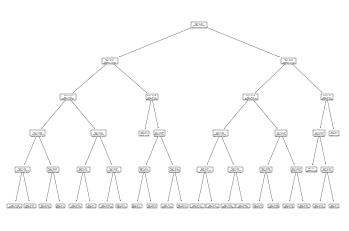

In [ ]:
plot_tree(model_dt['model'])

[Text(0.4583333333333333, 0.9166666666666666, 'X[31] <= 0.5\ngini = 0.365\nsamples = 25582\nvalue = [19426, 6156]'),
 Text(0.25, 0.75, 'X[1] <= 0.071\ngini = 0.122\nsamples = 13836\nvalue = [12936, 900]'),
 Text(0.16666666666666666, 0.5833333333333334, 'X[3] <= 0.434\ngini = 0.093\nsamples = 13590\nvalue = [12926, 664]'),
 Text(0.08333333333333333, 0.4166666666666667, 'gini = 0.053\nsamples = 10953\nvalue = [10652, 301]'),
 Text(0.25, 0.4166666666666667, 'gini = 0.237\nsamples = 2637\nvalue = [2274, 363]'),
 Text(0.3333333333333333, 0.5833333333333334, 'gini = 0.078\nsamples = 246\nvalue = [10, 236]'),
 Text(0.6666666666666666, 0.75, 'X[1] <= 0.051\ngini = 0.494\nsamples = 11746\nvalue = [6490, 5256]'),
 Text(0.5833333333333334, 0.5833333333333334, 'X[2] <= 0.409\ngini = 0.48\nsamples = 10798\nvalue = [6480, 4318]'),
 Text(0.4166666666666667, 0.4166666666666667, 'X[22] <= 0.5\ngini = 0.468\nsamples = 10190\nvalue = [6390, 3800]'),
 Text(0.3333333333333333, 0.25, 'X[46] <= 0.5\ngini = 0

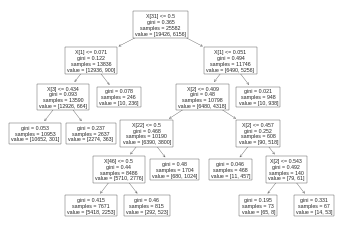

In [ ]:
best_tree = grid_pipe.best_estimator_
best_tree.fit(X_train, y_train)
plot_tree(best_tree['model'])

# Problema 3: Custos em saúde (multiclasse)

Um problema comum em hospitais e em planos de saúde é prever o custo dos clientes. Alguns pacientes necessitam de tratamento constante e caro e enquanto outros tem custos próximos de zero com picos de gastos devido algum problema de saúde. Nesse problema vamos analisar um dataset sobre pacientes com o objetivo de prever o custo do paciente em 2009, com base na informação sobre o paciente e o custo em 2008.

O custo do paciente foi discretizado em categorias representados nas variáveis bucket2008 e bucket2009. O custo mensal do paciente, dependendo da categoria do bucket é:

1. pacientes que custam menos de 3.000
2. pacientes que custam entre 3.000 e 8.000
3. pacientes que custam entre 8.000 e 19.000
4. pacientes que custam entre 19.000 e 55.000
5. pacientes que custam mais de 55.000

## Análise

Divida o conjunto em treinamento e teste. O objetivo é prever o custo do paciente em 2009 (variável bucket2009). Use algum método de classficação para prever a categoria de custo. Lembre-se que nesse tipo de problema queremos evitar o máximo possível de errar pacientes dos custos elevados (4 e 5).

In [ ]:
# dataset desbalanceado, principalmente pra classes 4 e 5
# rodar loop com 4 tipos de classificação e verificar log loss par verificar melhor modelo - aula de classificação  I ou II (reglog, KNN, SVM, DecisionTree, RandomForest)
# GridSearch ou RandommizerCV pra hiperparametros
# Matriz de confusão e curva ROC

In [ ]:
dados3 = pd.read_csv('https://raw.githubusercontent.com/abnr/ml-data/main/ClaimsData.csv')

In [ ]:
dados3.head()

,age,alzheimers,arthritis,cancer,copd,depression,diabetes,heart.failure,ihd,kidney,osteoporosis,stroke,reimbursement2008,bucket2008,reimbursement2009,bucket2009
0,85,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1
1,59,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1
2,67,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1
3,52,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1
4,67,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1


### Analise exploratória

In [ ]:
dados3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 458005 entries, 0 to 458004
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype
---  ------             --------------   -----
 0   age                458005 non-null  int64
 1   alzheimers         458005 non-null  int64
 2   arthritis          458005 non-null  int64
 3   cancer             458005 non-null  int64
 4   copd               458005 non-null  int64
 5   depression         458005 non-null  int64
 6   diabetes           458005 non-null  int64
 7   heart.failure      458005 non-null  int64
 8   ihd                458005 non-null  int64
 9   kidney             458005 non-null  int64
 10  osteoporosis       458005 non-null  int64
 11  stroke             458005 non-null  int64
 12  reimbursement2008  458005 non-null  int64
 13  bucket2008         458005 non-null  int64
 14  reimbursement2009  458005 non-null  int64
 15  bucket2009         458005 non-null  int64
dtypes: int64(16)
memory usage: 55.9 MB


In [ ]:
dados3.shape

(458005, 16)

In [ ]:
dados3.describe()

,age,alzheimers,arthritis,cancer,copd,depression,diabetes,heart.failure,ihd,kidney,osteoporosis,stroke,reimbursement2008,bucket2008,reimbursement2009,bucket2009
count,458005.000000,458005.000000,458005.000000,458005.000000,458005.000000,458005.000000,458005.000000,458005.000000,458005.000000,458005.000000,458005.000000,458005.000000,458005.000000,458005.000000,458005.000000,458005.000000
mean,72.628401,0.192214,0.154293,0.064106,0.136071,0.213076,0.380463,0.284744,0.420063,0.161153,0.173996,0.044792,4004.963854,1.436862,4277.432823,1.522160
std,12.557114,0.394041,0.361230,0.244942,0.342864,0.409482,0.485501,0.451293,0.493569,0.367673,0.379106,0.206847,9784.064063,0.861955,8480.041283,0.870425
min,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
25%,67.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,130.000000,1.000000
50%,73.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,950.000000,1.000000,1540.000000,1.000000
75%,81.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,3110.000000,2.000000,4220.000000,2.000000
max,100.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,221640.000000,5.000000,189930.000000,5.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f1fe7a83c10>,
      dtype=object)

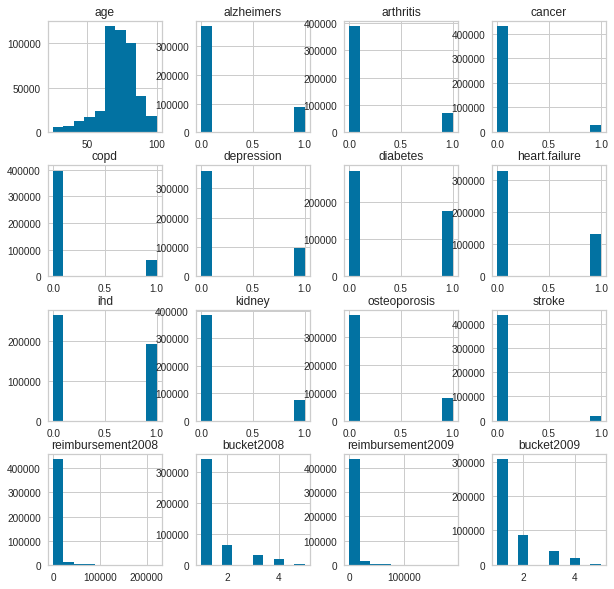

In [ ]:
dados3.hist(figsize=(10,10))

In [ ]:
# Dataset é desbalanceado... teremos que fazer uma divisão estratificada
dados3['bucket2009'].value_counts()

1    307444
2     87099
3     40976
4     19843
5      2643
Name: bucket2009, dtype: int64

In [ ]:
# Correlação com a variavel resposta
dados3.corr()['bucket2009'].sort_values(ascending=False)

bucket2009           1.000000
reimbursement2009    0.856687
bucket2008           0.452209
diabetes             0.389335
ihd                  0.389230
reimbursement2008    0.375460
kidney               0.369269
heart.failure        0.365463
copd                 0.311433
depression           0.282856
alzheimers           0.274621
arthritis            0.270990
cancer               0.210775
osteoporosis         0.206344
stroke               0.185346
age                  0.050100
Name: bucket2009, dtype: float64

### Train test split e pré-processamento

In [ ]:
# Train test split estratificado

X = dados3.drop(columns='bucket2009')
y = dados3['bucket2009']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=123)

{'boxes': [<matplotlib.lines.Line2D at 0x7f1fe40b39d0>],
 'caps': [<matplotlib.lines.Line2D at 0x7f1fe40888d0>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f1fe40182d0>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f1fe4088e50>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f1fe40b83d0>,
  <matplotlib.lines.Line2D at 0x7f1fe40b81d0>]}

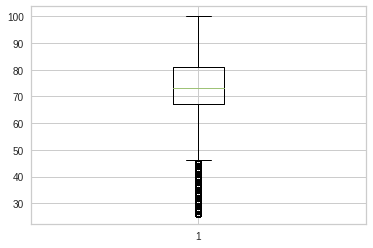

In [ ]:
# Programando processamento:
# coluna Age, reimbursement2008 e 2009 - normalizando para conseguir abranger dados dos outliers - StandardScaler
# coluna bucket2009: OneHotEncoder
plt.boxplot(dados3['age'])

In [ ]:
X_stand = X_train[['age', 'reimbursement2008', 'reimbursement2009']].columns.tolist()
X_cat = X_train[['bucket2008']].columns.tolist()

In [ ]:
# Programando processamento coluna Age - Column Transformer com MinMaxScaler

stand_preprocessor = ('standard_scaler',
                    StandardScaler(),
                    X_stand)

cat_preprocessor = ('one_hot_encoder',
                    OneHotEncoder(),
                    X_cat)

transformers = [stand_preprocessor, cat_preprocessor]

pre_processor = ColumnTransformer(transformers)

In [ ]:
# Rodando os modelos

Reglog = Pipeline(steps=[('pre_processor', pre_processor),
                          ('model', LogisticRegression(max_iter=5000))])

knn = Pipeline(steps=[('pre_processor', pre_processor),
                      ('model', KNeighborsClassifier())])


svm = Pipeline(steps=[('pre_processor', pre_processor),
                      ('model', LinearSVC())])

DecTree = Pipeline(steps=[('pre_processor', pre_processor),
                          ('model', DecisionTreeClassifier())])

NaiveBayes = Pipeline(steps=[('pre_processor', pre_processor),
                             ('model', GaussianNB())])

In [ ]:
# Treinando os modelos
Reglog.fit(X_train, y_train)
knn.fit(X_train, y_train)
svm.fit(X_train, y_train)
DecTree.fit(X_train, y_train)
NaiveBayes.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


Pipeline(steps=[('pre_processor',
                 ColumnTransformer(transformers=[('standard_scaler',
                                                  StandardScaler(),
                                                  ['age', 'reimbursement2008',
                                                   'reimbursement2009']),
                                                 ('one_hot_encoder',
                                                  OneHotEncoder(),
                                                  ['bucket2008'])])),
                ('model', GaussianNB())])

In [ ]:
# Calculando Log loss

models = [Reglog, knn, DecTree, NaiveBayes]

for model in models:
  y_pred_train = model.predict_proba(X_train)
  y_pred_test = model.predict_proba(X_test)

  print(type(model['model']).__name__,'\n')
  print(f'log loss treino: {log_loss(y_train, y_pred_train)}')
  print(f'log loss test: {log_loss(y_test, y_pred_test)}')
  print(100*'-')

LogisticRegression 

log loss treino: 0.02898985279791852
log loss test: 0.02888737167578622
----------------------------------------------------------------------------------------------------
KNeighborsClassifier 

log loss treino: 0.01477616556223854
log loss test: 0.035552621346182076
----------------------------------------------------------------------------------------------------
DecisionTreeClassifier 

log loss treino: 4.3189685191270484e-15
log loss test: 4.318968114076985e-15
----------------------------------------------------------------------------------------------------
GaussianNB 

log loss treino: 0.9412828186579177
log loss test: 0.9398615949289102
----------------------------------------------------------------------------------------------------


Comparando as matrizes de confusão, vemos que a regressão logistica é o melhor modelo, pois é o que menos erra quanto a previsão das classes 4 e 5

A DecisionTree tambem apresentou uma ótima performance, mas como não houve hiperparametros definidos, isso pode ser indicativo de overfitting

Vamos buscar os hiperparametros da árvore para ver se sua performance fica tão boa quanto a da regressao logistica

In [ ]:
plot_confusion_matrix(Reglog, X_test, y_test)

ValueError: ignored

In [ ]:
plot_confusion_matrix(knn, X_test, y_test)

In [ ]:
plot_confusion_matrix(svm, X_test, y_test)

In [ ]:
plot_confusion_matrix(DecTree, X_test, y_test)

In [ ]:
plot_confusion_matrix(NaiveBayes, X_test, y_test)

### Busca hiperparametros Decision Tree

In [ ]:
path = DecTree[-1].cost_complexity_pruning_path(DecTree[:-1].transform(X_train), y_train)
path

In [ ]:
# Rodando Decision Tree para os diferentes alphas encontrados pelo pruning cost complexity
alphas = path.ccp_alphas

clfs = []
for alpha in alphas:
  clf = DecisionTreeClassifier(ccp_alpha=alpha)
  clf.fit(X_train, y_train)
  clfs.append(clf)

In [ ]:
# Vend qual valor de alpha poderia maximizar a acurácia
train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(alphas, train_scores, marker='o', label="train",
        drawstyle="steps-post")
ax.plot(alphas, test_scores, marker='o', label="test",
        drawstyle="steps-post")
ax.legend()
plt.show()

Com o gráfico, percebemos que um valor de alpha em 0,12 (aproximadamente) fez com que a acurácia se mantivesse em 86%

Logo, vamos utilizar este valor e buscar os outros hiperparametros

In [ ]:
DecTree_p = Pipeline(steps=[('pre_processor', pre_processor),
                          ('model', DecisionTreeClassifier(ccp_alpha=0.12))])

In [ ]:
# Grid de parametros
criterion = ['gini', 'entropy']
splitter = ['best', 'random']
max_depth = list(range(0, 50))
min_sample_split = list(range(0, 20))
max_features = list(range(0, 15))
min_sample_leaf = list(range(0, 50))
max_leaf_nodes = list(range(0, 100))

param_grid = {'model__criterion': criterion,
              'model__splitter': splitter,
              'model__max_depth': max_depth,
              'model__min_samples_split': min_sample_split,
              'model__min_samples_leaf': min_sample_leaf,
              'model__max_features': max_features,
              'model__max_leaf_nodes': max_leaf_nodes,
              }

In [ ]:
# Validador

ckf = StratifiedKFold(n_splits=10, shuffle=True, random_state=123)

In [ ]:
# Rodando random search

random_search = RandomizedSearchCV(DecTree_p, param_grid, cv=ckf, scoring='f1_micro', n_iter=50)
random_search.fit(X_train, y_train)

In [ ]:
random_search.best_params_

In [ ]:
best_tree = random_search.best_estimator_
best_tree.fit(X_train, y_train)

In [ ]:
log_loss(y_test, best_tree.predict_proba(X_test))

In [ ]:
plot_tree(best_tree['model'])

In [ ]:
plot_confusion_matrix(best_tree, X_test, y_test)

CONCLUSÃO: Melhor modelo para realizar a classificação, pensando em errar o mínimo possível das classes 4 e 5,  é a regressão logistica!

Mesmo com a busca dos hiperparametros com base em score F1 e alpha determinado, a arvore de decisão não consegue acertar todos da classe 5.